# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
import math

In [2]:
dataset = pd.read_csv('dataset_bank.csv')

In [3]:
dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,3.900000e+01,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,4.400000e+01,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3.600000e+01,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3.400000e+01,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,2.100000e+01,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,4.000000e+01,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,2.500000e+01,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3.600000e+01,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,2.147484e+09,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
dataset = dataset.drop(columns=dataset.columns[0])

In [5]:
# data statistics
dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
#Check for missing values
for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

In [7]:
dataset['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27], dtype=int64)

In [8]:
dataset['Months_on_book'].unique()

array([ 3.90000000e+01,  4.40000000e+01,  3.60000000e+01,  3.40000000e+01,
        2.10000000e+01,  4.60000000e+01,  2.70000000e+01,  3.10000000e+01,
        5.40000000e+01,  3.00000000e+01,  4.80000000e+01,  3.70000000e+01,
        5.60000000e+01,  4.20000000e+01,  4.90000000e+01,  3.30000000e+01,
        2.80000000e+01,  3.80000000e+01,  4.10000000e+01,  4.30000000e+01,
        4.50000000e+01,  5.20000000e+01,  4.00000000e+01,  5.00000000e+01,
        3.50000000e+01,  4.70000000e+01,  3.20000000e+01,  2.00000000e+01,
        2.90000000e+01,  2.50000000e+01,  5.30000000e+01,  2.40000000e+01,
        5.50000000e+01,  2.30000000e+01,  2.20000000e+01,  2.60000000e+01,
        2.14748365e+09,  1.30000000e+01,  5.10000000e+01,  1.90000000e+01,
        1.50000000e+01,  1.70000000e+01,  1.80000000e+01, -2.14748365e+09,
        1.60000000e+01,  1.40000000e+01,  3.21000000e+11])

In [9]:
dataset['Months_on_book'] = dataset.Months_on_book.replace({-2147483647: 'None', 
                                                              2147483647: 'None', 
                                                              3.21E+11: 'None'})

In [10]:
dataset['Months_on_book'].unique()

array([39.0, 44.0, 36.0, 34.0, 21.0, 46.0, 27.0, 31.0, 54.0, 30.0, 48.0,
       37.0, 56.0, 42.0, 49.0, 33.0, 28.0, 38.0, 41.0, 43.0, 45.0, 52.0,
       40.0, 50.0, 35.0, 47.0, 32.0, 20.0, 29.0, 25.0, 53.0, 24.0, 55.0,
       23.0, 22.0, 26.0, 'None', 13.0, 51.0, 19.0, 15.0, 17.0, 18.0, 16.0,
       14.0], dtype=object)

In [11]:
dataset['Months_on_book'].value_counts()

36.0    2417
37.0     358
34.0     351
38.0     347
39.0     341
40.0     333
31.0     318
35.0     314
33.0     304
30.0     300
41.0     297
32.0     289
28.0     275
43.0     273
42.0     271
29.0     241
44.0     230
45.0     227
27.0     206
46.0     197
26.0     186
47.0     171
25.0     165
48.0     162
24.0     160
49.0     141
23.0     116
22.0     105
56.0     103
50.0      96
21.0      83
51.0      80
53.0      78
20.0      74
13.0      70
19.0      63
52.0      62
18.0      58
54.0      53
None      52
55.0      42
17.0      39
15.0      34
16.0      29
14.0      16
Name: Months_on_book, dtype: int64

In [12]:
dataset['Months_on_book'] = dataset['Months_on_book'].replace('None', np.nan)

In [13]:
from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors=2)

columns = ['Months_on_book']
dataset[columns] = transformer.fit_transform(dataset[columns])

# ------------------------------------------------------------------------------------------
# imputer = KNNImputer(n_neighbors=2)
# imputed = imputer.fit_transform(dataset[['Months_on_book']])
# dataset_without_missing_values = pd.DataFrame(imputed, columns=dataset[['Months_on_book']])

In [14]:
dataset['Months_on_book'].unique()

array([39.        , 44.        , 36.        , 34.        , 21.        ,
       46.        , 27.        , 31.        , 54.        , 30.        ,
       48.        , 37.        , 56.        , 42.        , 49.        ,
       33.        , 28.        , 38.        , 41.        , 43.        ,
       45.        , 52.        , 40.        , 50.        , 35.        ,
       47.        , 32.        , 20.        , 29.        , 25.        ,
       53.        , 24.        , 55.        , 23.        , 22.        ,
       26.        , 35.92903226, 13.        , 51.        , 19.        ,
       15.        , 17.        , 18.        , 16.        , 14.        ])

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [16]:
dataset['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

Text(0.5, 0, 'Target class')

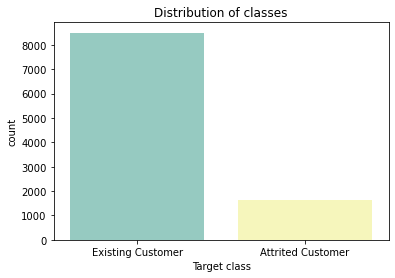

In [17]:
from matplotlib import pyplot as plt
sns.countplot(x=dataset['Attrition_Flag'], palette="Set3")
plt.title('Distribution of classes')
plt.xlabel('Target class')

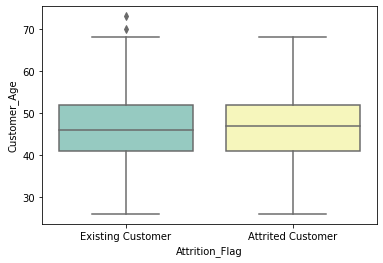

In [18]:
sns.boxplot(data=dataset, x="Attrition_Flag", y="Customer_Age", palette="Set3")
plt.show()

C:\Users\aleksandar\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of age for target class Attrition_Flag')

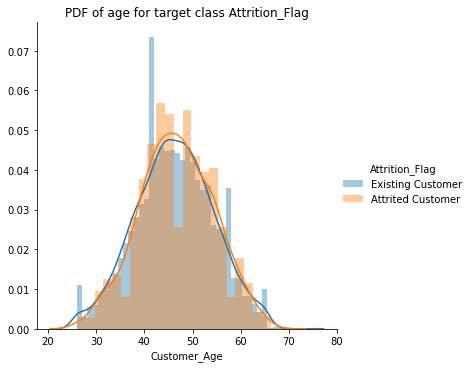

In [19]:
sns.FacetGrid(dataset, hue='Attrition_Flag', size=5) \
.map(sns.distplot, 'Customer_Age') \
.add_legend()
plt.title('PDF of age for target class Attrition_Flag')

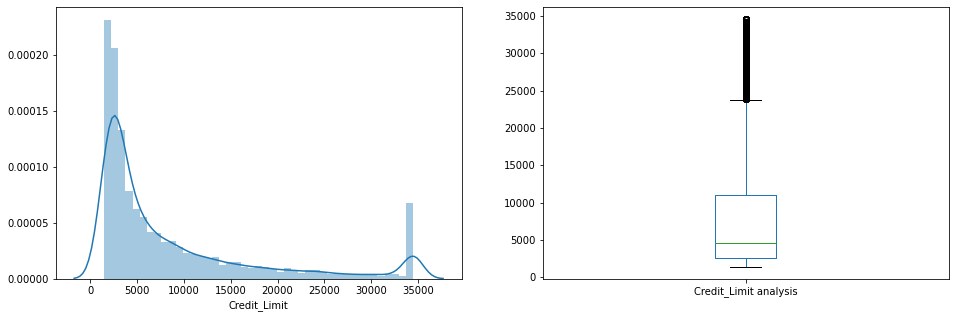

In [20]:
plt.figure()

plt.subplot(121) # nrows, ncols, index
sns.distplot(dataset['Credit_Limit'],label="Credit_Limit")

plt.subplot(122)
dataset['Credit_Limit'].plot(kind='box',
                    figsize=(16,5),
                    label="Credit_Limit analysis")

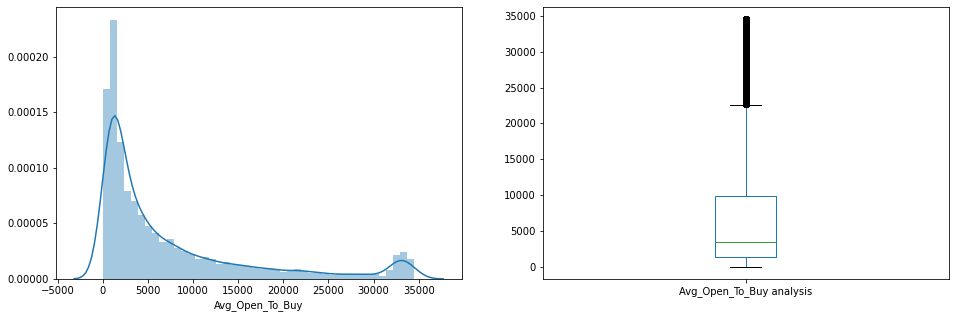

In [21]:
plt.figure()

plt.subplot(121) # nrows, ncols, index
sns.distplot(dataset['Avg_Open_To_Buy'],label="Avg_Open_To_Buy")

plt.subplot(122)
dataset['Avg_Open_To_Buy'].plot(kind='box',
                    figsize=(16,5),
                    label="Avg_Open_To_Buy analysis")

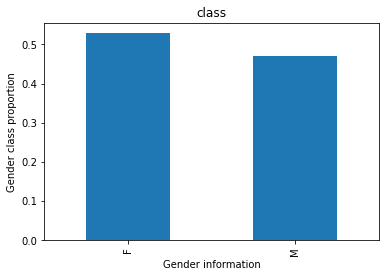

In [22]:
plt.title("Gender class Bar plot Description")
plt.xlabel("Gender information")
plt.ylabel("Gender class proportion")

dataset['Gender'].value_counts(normalize=True).plot.bar(title='class')

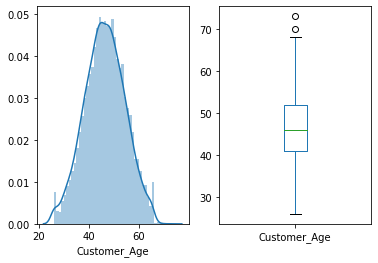

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['Customer_Age'])
plt.subplot(122)
dataset['Customer_Age'].plot.box()

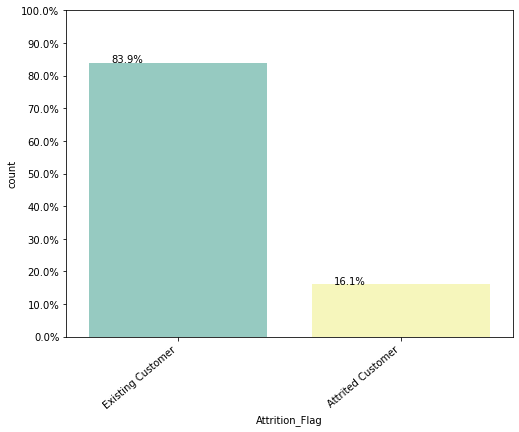

In [24]:
plt.figure(figsize=(8,6))
Y = dataset['Attrition_Flag']
total = len(Y)*1.
ax=sns.countplot(x="Attrition_Flag", data=dataset, palette="Set3")
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

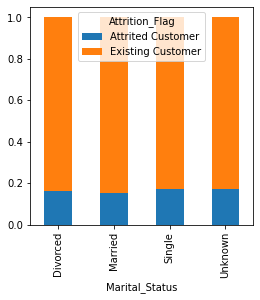

In [25]:
Marriage=pd.crosstab(dataset["Marital_Status"],dataset['Attrition_Flag'])
Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

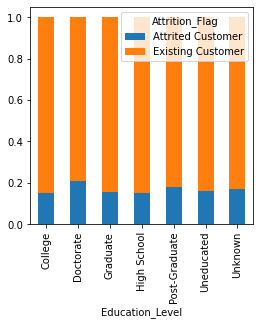

In [26]:
Education=pd.crosstab(dataset["Education_Level"],dataset['Attrition_Flag'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

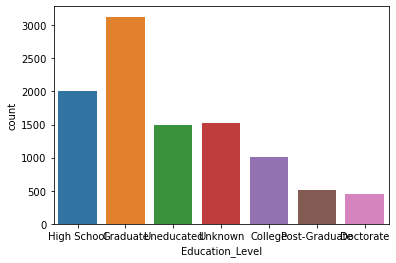

In [27]:
sns.countplot(dataset['Education_Level'])

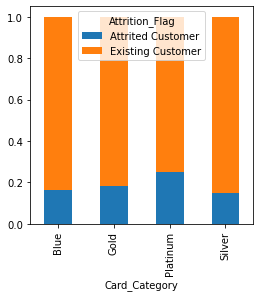

In [28]:
House=pd.crosstab(dataset["Card_Category"],dataset['Attrition_Flag'])
House.div(House.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = dataset[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [30]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = dataset[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="Attrition_Flag")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

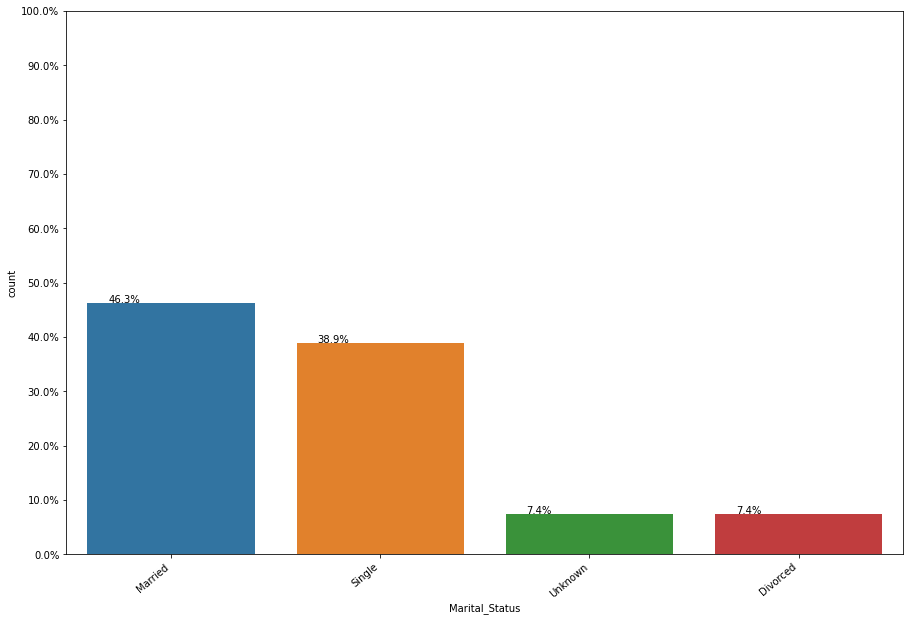

In [31]:
countplot("Marital_Status", dataset)

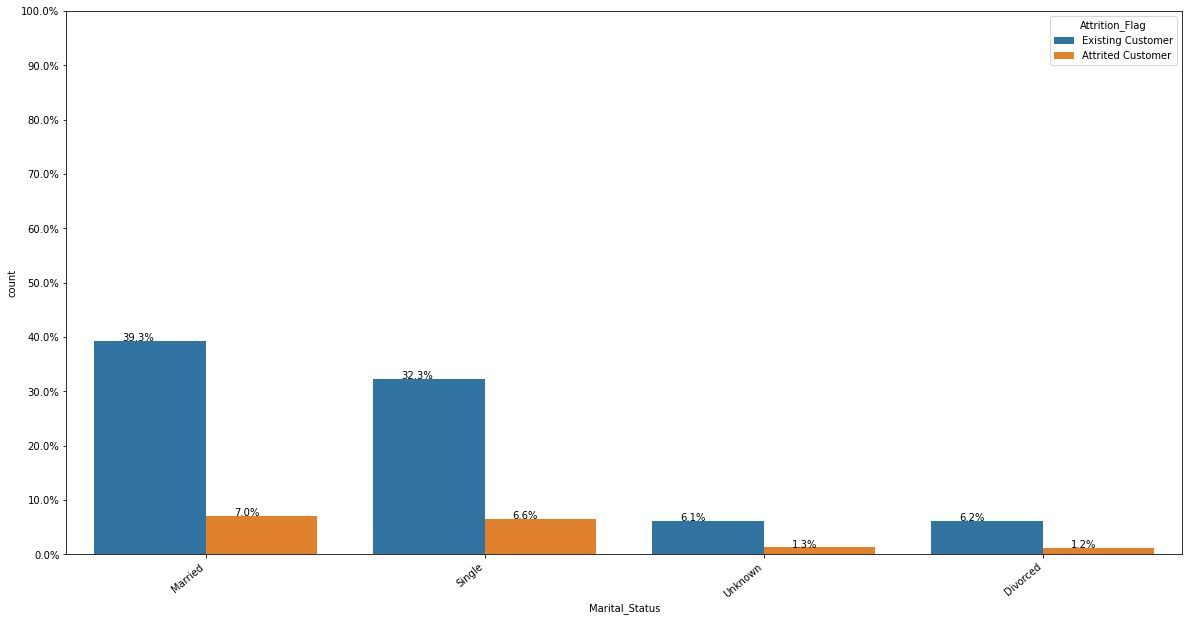

In [32]:
countplot_withY("Marital_Status", dataset)

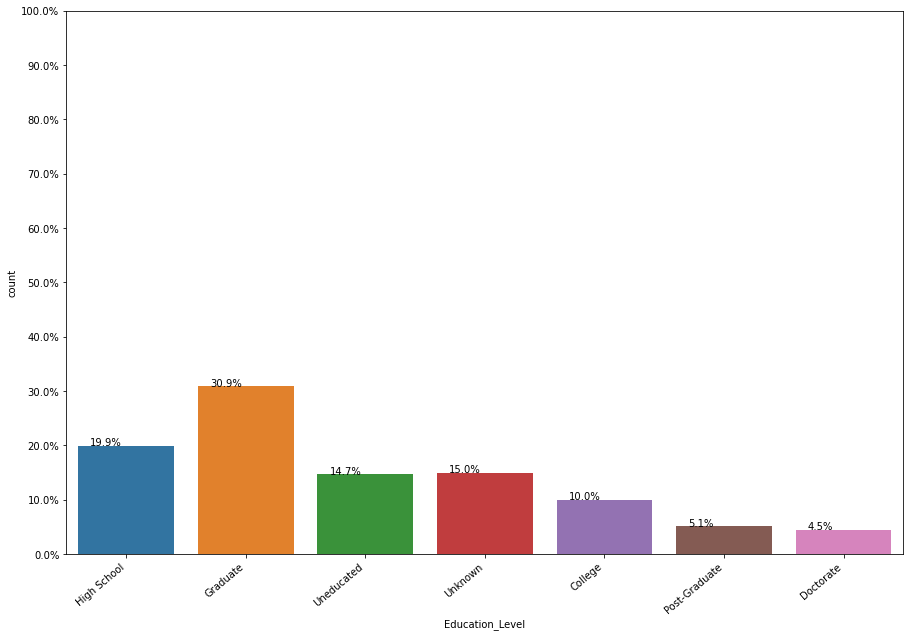

In [33]:
countplot("Education_Level", dataset)

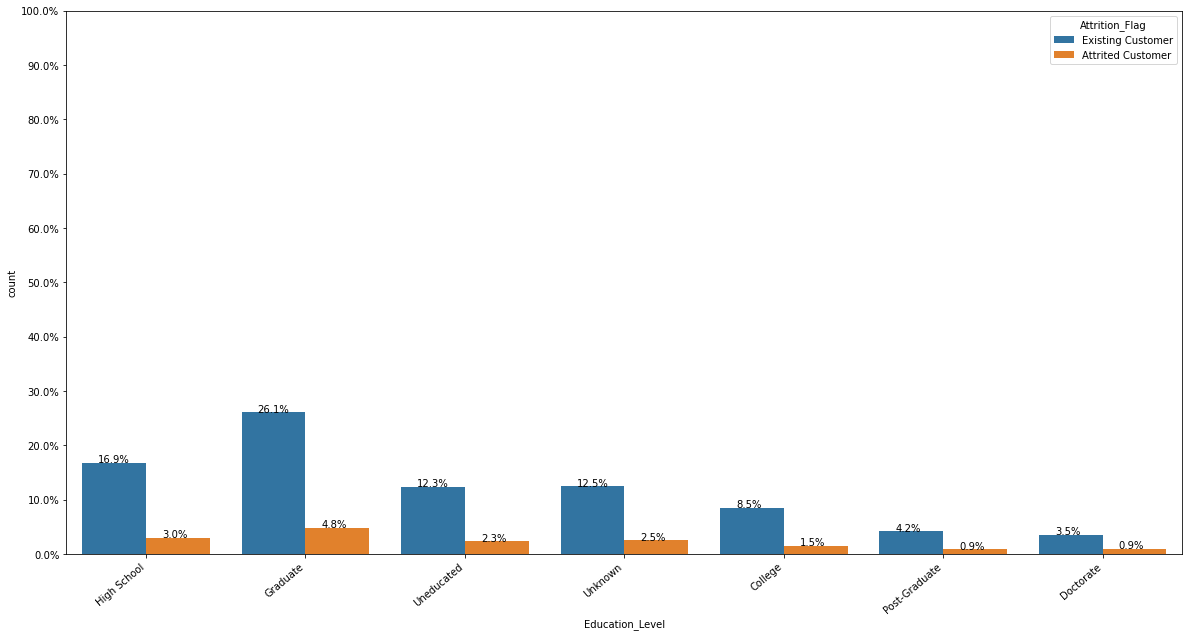

In [34]:
countplot_withY("Education_Level", dataset)

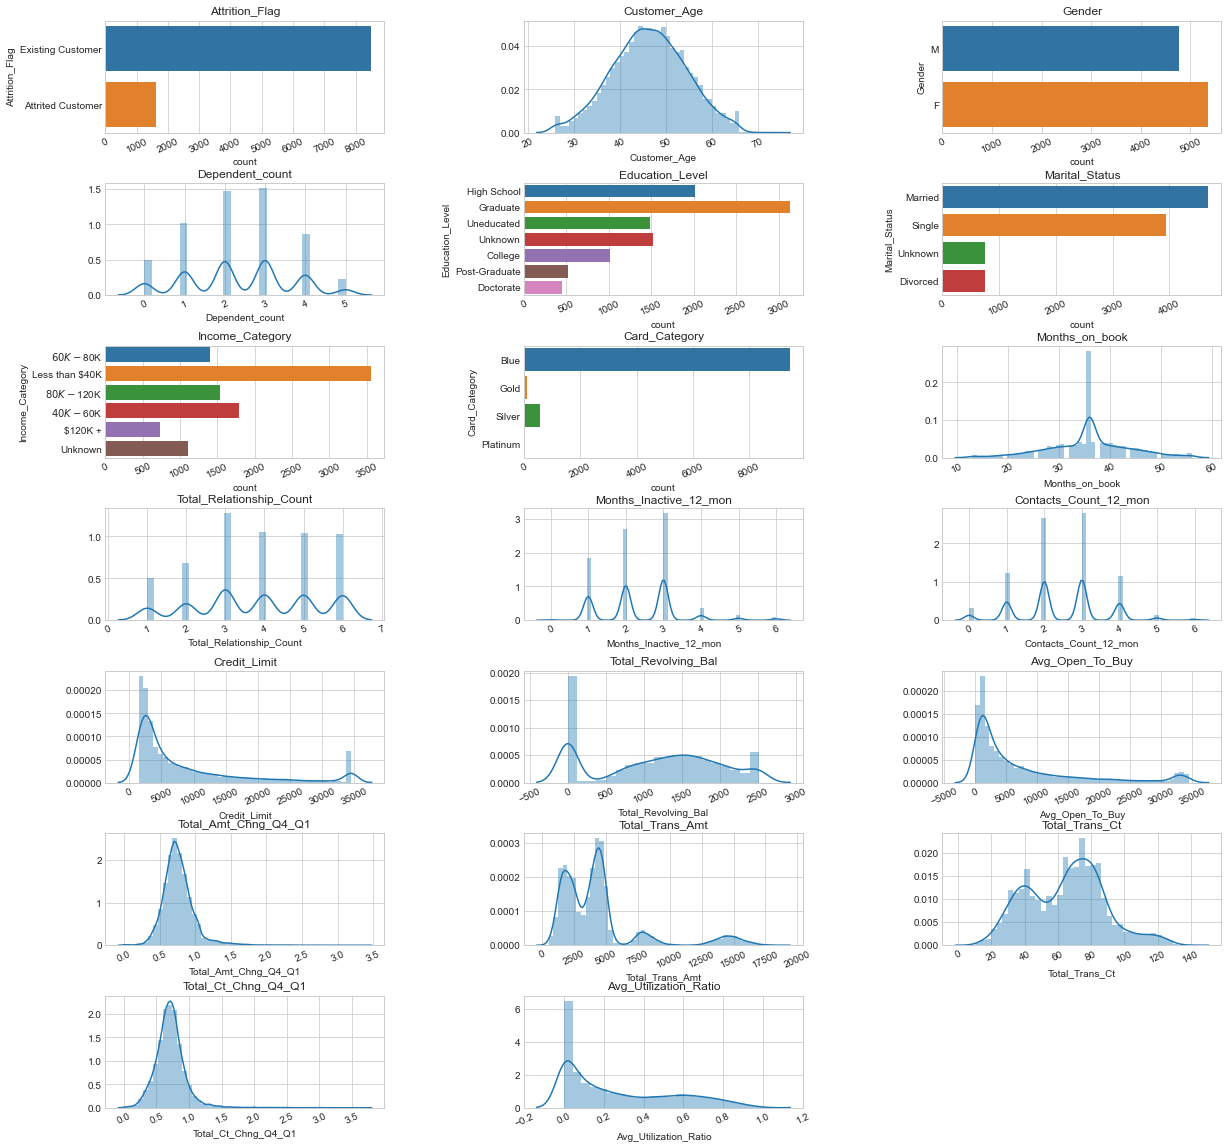

In [35]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            try:
                g = sns.distplot(dataset[column])
                plt.xticks(rotation=25)
            except RuntimeError as re:
                if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                    sns.distplot(dataset[column], kde_kws={'bw': 0.1})
                else:
                    raise re
    
plot_distribution(dataset, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

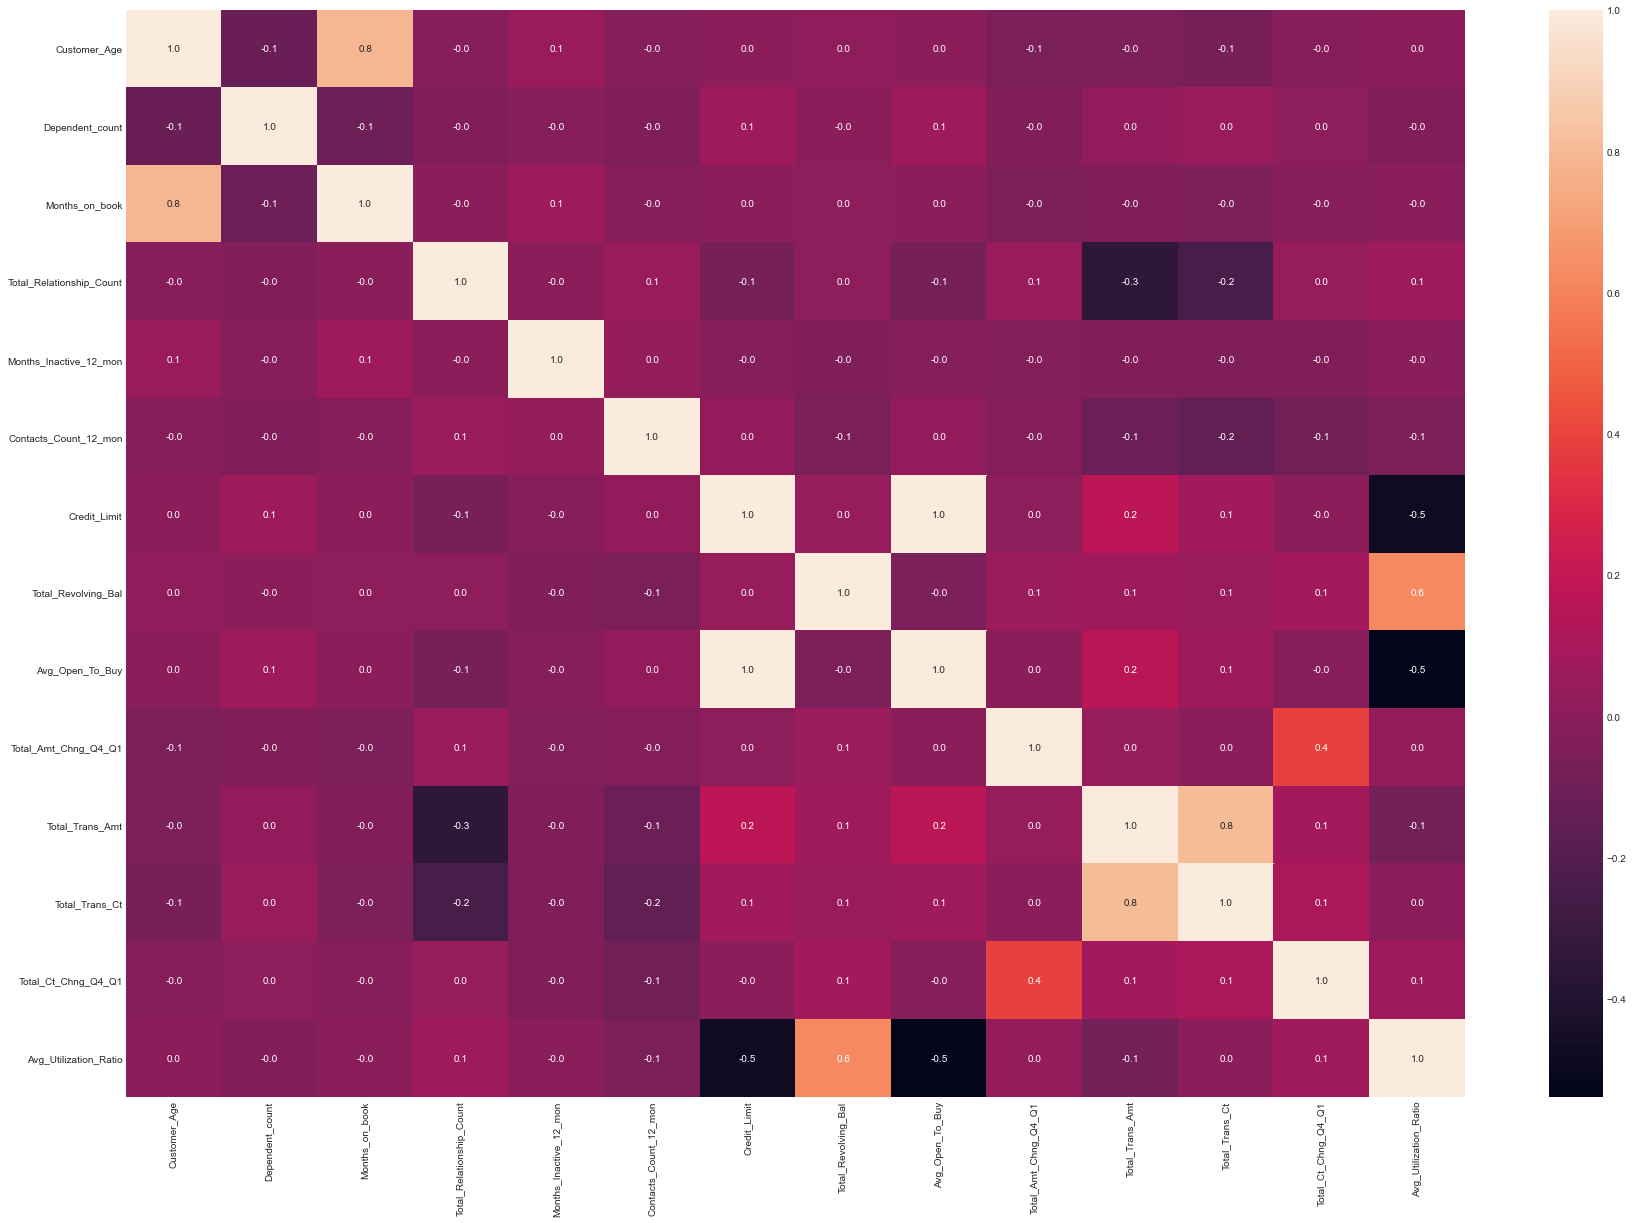

In [36]:
X = dataset.drop(['Attrition_Flag'], axis=1)
y = dataset['Attrition_Flag']

result = pd.concat([X, y], axis=1)
correlation_train=result.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_train, annot=True, fmt='.1f')
plt.show()

In [54]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

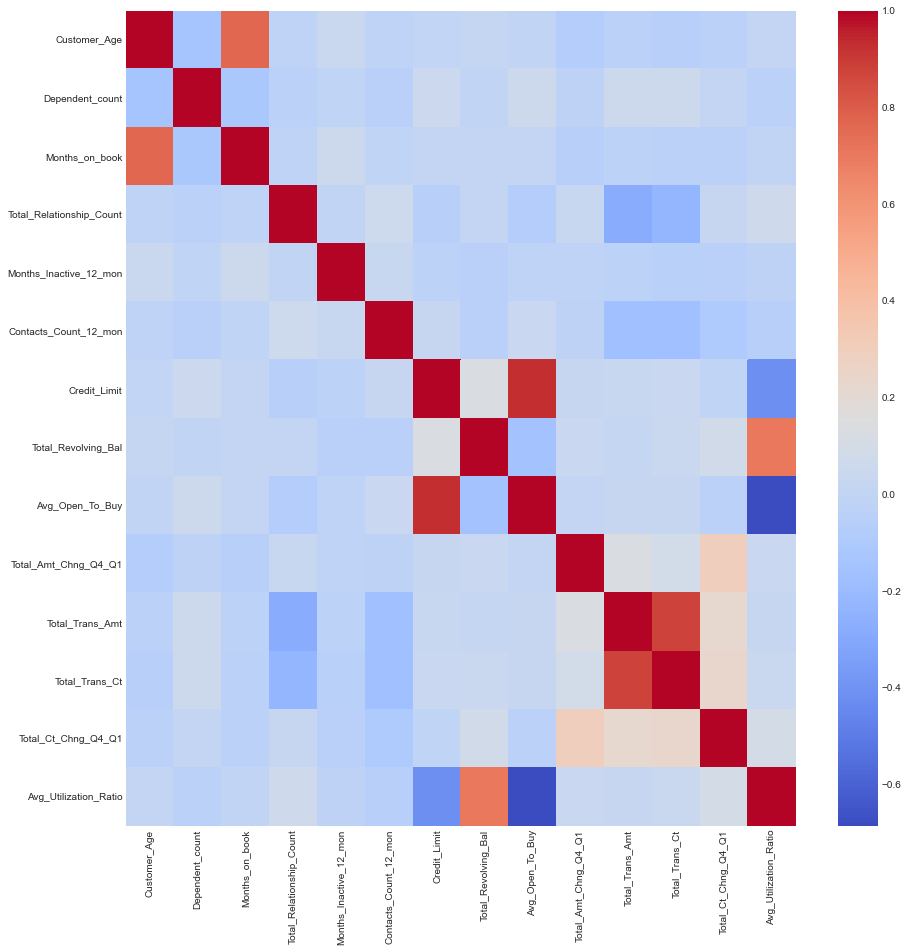

In [55]:
drawheatmap(dataset)

## 1. Data preprocessing, normalization, missing data, categorical data

In [37]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------
Category columns
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [38]:
from sklearn.preprocessing import StandardScaler

def scale(dataset, columns):
    dataset_new = dataset.copy()
    standard_scaller = StandardScaler() 
    dataset_new[columns] = standard_scaller.fit_transform(dataset_new[columns])

    
    return dataset_new

In [39]:
dataset_scaled = scale(dataset, columns=['Customer_Age',
                                         'Dependent_count',
                                         'Months_on_book',
                                         'Total_Relationship_Count',
                                         'Months_Inactive_12_mon',
                                         'Contacts_Count_12_mon',
                                         'Credit_Limit',
                                         'Total_Revolving_Bal',
                                         'Avg_Open_To_Buy',
                                         'Total_Amt_Chng_Q4_Q1',
                                         'Total_Trans_Amt',
                                         'Total_Trans_Ct',
                                         'Total_Ct_Chng_Q4_Q1',
                                         'Avg_Utilization_Ratio'])

In [40]:
from sklearn.preprocessing import LabelEncoder

def label_encoding_notordinal(dataset, columns):
    dataset_ = dataset.copy()
    transformer = LabelEncoder()
    for column in columns:
        dataset_[column]  = transformer.fit_transform(dataset_[column])
    return dataset_

In [41]:
dataset_label_encoded = label_encoding_notordinal(dataset_scaled, columns=['Income_Category',
                                                                           'Attrition_Flag'])

In [42]:
def one_hot_encoding(dataset, columns):
    dataset_new = dataset.copy()
    data_dummies =  pd.get_dummies(dataset[columns])
    dataset_new = pd.concat([dataset_new, data_dummies],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new

In [43]:
dataset_one_hot_encoded = one_hot_encoding(dataset_label_encoded, columns=['Gender',
                                                                           'Education_Level',
                                                                           'Marital_Status',
                                                                           'Card_Category'])

In [45]:
dataset_one_hot_encoded.head()

,Attrition_Flag,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,-0.165406,0.503368,2,0.384548,0.763943,-1.327136,0.492404,0.446622,-0.473422,...,0,0,0,1,0,0,1,0,0,0
1,1,0.333570,2.043199,4,1.010652,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,...,0,0,0,0,1,0,1,0,0,0
2,1,0.583058,0.503368,3,0.008887,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,...,0,0,0,1,0,0,1,0,0,0
3,1,-0.789126,1.273283,4,-0.241555,-0.522785,1.641478,-1.315636,-0.585251,1.661686,...,0,0,0,0,0,1,1,0,0,0
4,1,-0.789126,0.503368,2,-1.869423,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,...,1,0,0,1,0,0,1,0,0,0


## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

In [46]:
X = dataset_one_hot_encoded.drop(['Attrition_Flag'], axis=1)
y = dataset_one_hot_encoded['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [47]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_jobs=-1,
                              max_depth=8,
                              n_estimators=13,
                              min_samples_leaf=4, 
                              max_leaf_nodes=100, 
                              criterion='entropy',
                              max_features=20,
                              random_state=0)
tree.fit(X_train, y_train)


print('The accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

The accuracy on the training subset: 0.975
The accuracy on the test subset: 0.956


In [48]:
from sklearn.ensemble import RandomForestClassifier
r_tree = RandomForestClassifier(n_jobs=1,
                              max_depth=7,
                              n_estimators=11,
                              min_samples_leaf=4, 
                              max_leaf_nodes=100, 
                              criterion='gini',
                              max_features=20,
                              random_state=0)
r_tree.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(r_tree.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(r_tree.score(X_test, y_test)))

The accuracy on the training subset: 0.968
The accuracy on the test subset: 0.953


In [49]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=10., 
                              min_samples_leaf=15, 
                              max_leaf_nodes=200, 
                              criterion='entropy')

tree.fit(X_train, y_train)
print('The accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))

print('The accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

The accuracy on the training subset: 0.960
The accuracy on the test subset: 0.944


In [50]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10., 
                              min_samples_leaf=17, 
                              max_leaf_nodes=100, 
                              criterion='gini')

tree.fit(X_train, y_train)
print('The accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))

print('The accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

The accuracy on the training subset: 0.953
The accuracy on the test subset: 0.935


In [51]:
from sklearn.svm import SVC 

svm = SVC(kernel='rbf', 
          C=0.15, 
          gamma='auto', 
          tol=0.5,
          random_state=0
         )
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 0.907
The accuracy on the test subset: 0.909


In [52]:
from sklearn.neighbors import KNeighborsRegressor
# create the KNN regressor, train it and make the predictions

clf = KNeighborsRegressor(n_neighbors=7, metric='manhattan')
clf.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

The accuracy on the training subset: 0.648
The accuracy on the test subset: 0.470


In [53]:
from sklearn.svm import SVR
# create the SVR , train it and make the predictions

clf = SVR(kernel='poly', C=10)
clf.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

The accuracy on the training subset: 0.709
The accuracy on the test subset: 0.442


## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect